In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from mpl_toolkits.mplot3d import Axes3D

In [61]:
def espacios ():
    #Esta función es unicamente de visulización, para facilitar la lectura
    print("\n"*2)
def sturges (data):
    #Esta función calcula el número de clases que se deben de tener en un histograma en funcion de la cantidad de datos
    n = len(data)
    k = 1 + 3.322*np.log10(n)
    return int(k)

In [62]:

# Cargamos el archivo de datos
sql_connection = sql.connect('data_01_nuevo.db')
data_01 = pd.read_sql_query("SELECT * FROM data_01_nuevo", sql_connection)
data_01['date'] = pd.to_datetime(data_01['date'])
data_01.set_index('date', inplace=True)
sql_connection.close()


In [63]:
#Analis preliminar de la distribución de los datos
print(data_01.info())
espacios()
print(data_01.describe())
espacios()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737453 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation 

In [64]:
#Se visualizan las columnas 
print(data_01.columns)

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')


In [65]:
#se genera una lista de las columnas que seran tenidas en cuenta
columnas = ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       '% Iron Concentrate', '% Silica Concentrate']
data_01 = data_01[columnas]
columnas_nuevo_nombre = ['% Iron Feed', '% Silica Feed', 'Starch Flow m3/h', 'Amina Flow m3/h',
       'Ore Pulp Mass Flow Ton/h', 'Ore Pulp pH', 'Ore Pulp Density kg/L',
       '% Iron Concentrate', '% Silica Concentrate']
data_01.columns = columnas_nuevo_nombre

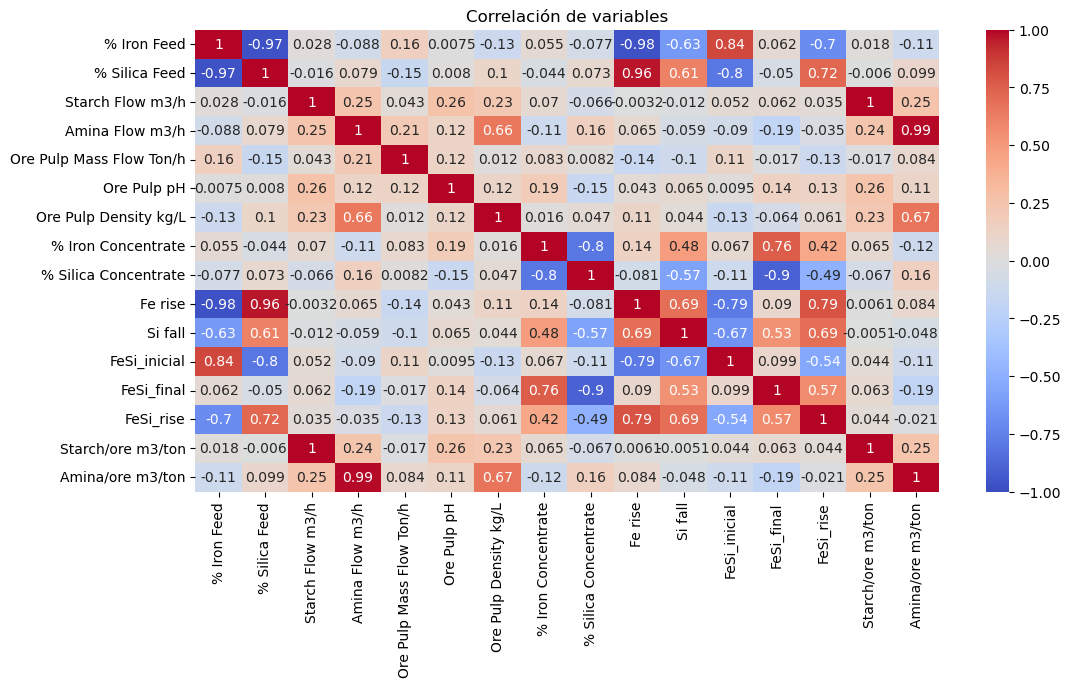

In [83]:

data_01["Fe rise"] = (data_01["% Iron Concentrate"] - data_01["% Iron Feed"])/data_01["% Iron Feed"]
data_01["Si fall"] = (data_01["% Silica Concentrate"] - data_01["% Silica Feed"])/data_01["% Silica Feed"]*-1
data_01["FeSi_inicial"]= data_01["% Iron Feed"] / data_01["% Silica Feed"]
data_01["FeSi_final"]= data_01["% Iron Concentrate"] / data_01["% Silica Concentrate"]
data_01["FeSi_rise"] = (data_01["FeSi_final"] - data_01["FeSi_inicial"])/data_01["FeSi_inicial"]
data_01["Starch/ore m3/ton"]= data_01["Starch Flow m3/h"] / data_01["Ore Pulp Mass Flow Ton/h"]
data_01["Amina/ore m3/ton"]= data_01["Amina Flow m3/h"] / data_01["Ore Pulp Mass Flow Ton/h"]

plt.figure(figsize=(12, 6))
sns.heatmap(data_01.corr(), annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.title('Correlación de variables')
plt.show()


In [67]:
columnas=data_01.columns
nombres=["% hierro alimentación",
         "% sílice alimentación",
         "Flujo de almidón",
         "Flujo de amina",
         "Flujo de pulpa de mineral",
         "pH de la pulpa de mineral",
         "Densidad de la pulpa de mineral",
         "% hierro concentrado",
         "% sílice concentrado",
         "Aumento concentración de hierro",
         "Disminución concentración de sílice",
         "Relación Fe/Si inicial",
         "Relación Fe/Si final",
         "Aumento de la relación Fe/Si",
        "Relación de almidón por tonelada de mineral",
        "Relación de amina por tonelada de mineral"
         ]
dict_nombres=dict(zip(columnas,nombres))

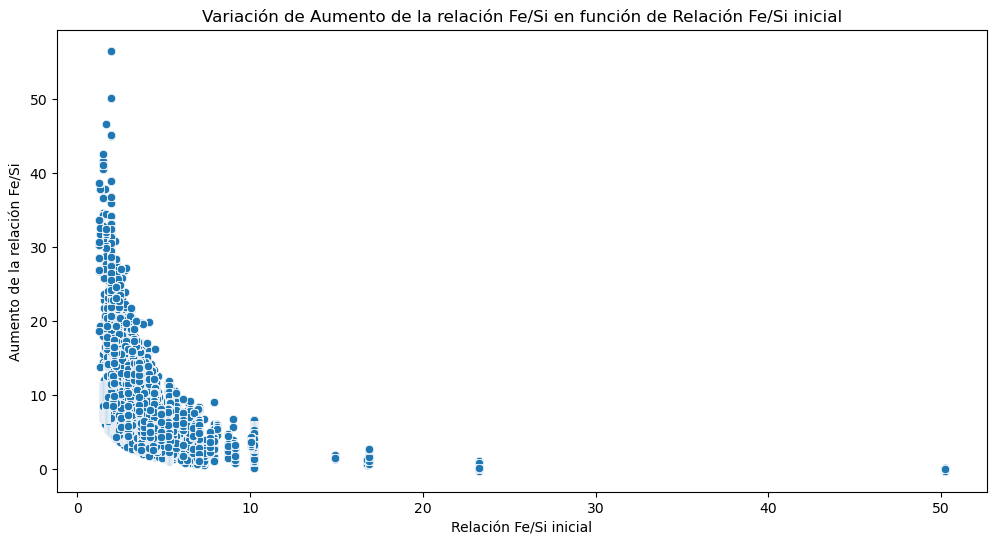

In [68]:
Variable_x="FeSi_inicial"
Variable_y="FeSi_rise"
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_01, x=Variable_x, y=Variable_y)
plt.xlabel(dict_nombres[Variable_x])
plt.ylabel(dict_nombres[Variable_y])
plt.title(f"Variación de {dict_nombres[Variable_y]} en función de {dict_nombres[Variable_x]}")
plt.show()

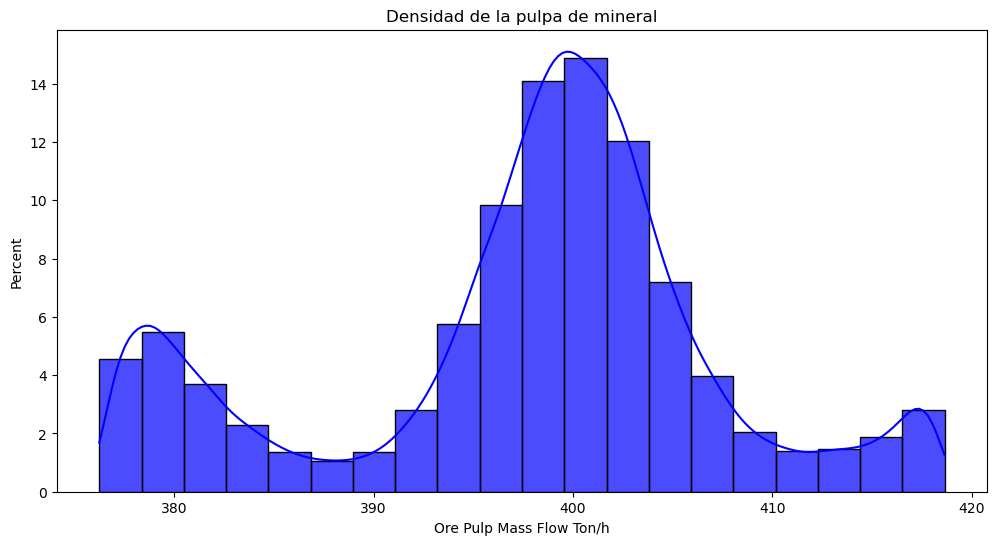

In [82]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data_01, x="Ore Pulp Mass Flow Ton/h", bins=sturges(data_01["Ore Pulp Mass Flow Ton/h"]), kde=True,
             color='blue',
             edgecolor='black',
             linewidth=1,
             alpha=0.7,
             stat='percent')
plt.title("Densidad de la pulpa de mineral")
plt.show()